In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from tqdm import tqdm

In [49]:

from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss

# n0 correspond au nombre de parametres d entrée
# n1 represente le nombre de neurones dans la hidden layer
# n2  correspond a la taille de y (de sortie)
def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

def forward_propagation(X, parametres):
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }

    return gradients

def update(gradients, parametres, learning_rate):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  A2 = activations['A2']
  return A2 >= 0.5

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score
from tqdm import tqdm
from matplotlib.colors import ListedColormap

# Define your neural_network function with decision boundary plotting
def neural_network(X, y, n1=32, learning_rate=0.1, n_iter=1000):

    # Initialisation des paramètres
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    history = []

    # Gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']

        # Plot courbe d'apprentissage
        train_loss.append(log_loss(y.flatten(), A2.flatten()))
        y_pred = predict(X, parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))

        history.append([parametres.copy(), train_loss, train_acc, i])

        # Mise à jour
        gradients = back_propagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)

    # Courbes d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accuracy')
    plt.legend()
    plt.show()

    # Plot decision boundary
    plot_decision_boundary(X, y, parametres)

    return parametres

# Define the decision boundary plotting function
def plot_decision_boundary(X, y, parametres):
    # Mesh grid for plotting decision boundary
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Flatten the grid to pass into the network
    grid_points = np.c_[xx.ravel(), yy.ravel()].T

    # Forward propagation on grid points
    activations = forward_propagation(grid_points, parametres)
    Z = activations['A2']
    Z = Z.reshape(xx.shape)

    # Plot the contour and data points
    plt.figure()
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap=ListedColormap(['#008000', '#FFFF00']))
    plt.scatter(X[0, :], X[1, :], c=y, edgecolors='k', cmap=ListedColormap(['#008000', '#FFFF00']))
    plt.title("Decision Boundary")
    plt.show()




#Modèle RNA

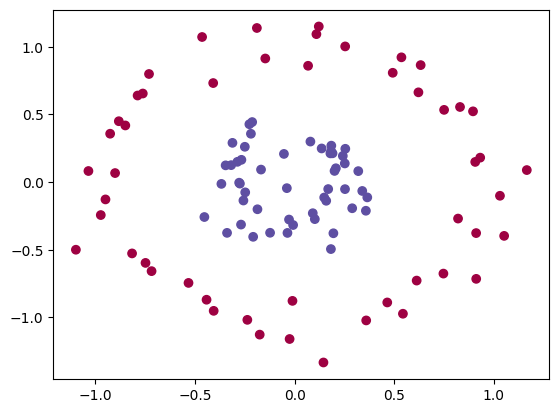

In [19]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, noise=0.1, factor=0.3,random_state=0)
X = X.T
y = y.reshape(1, y.shape[0])
plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
plt.show()

100%|██████████| 1000/1000 [00:01<00:00, 527.47it/s]


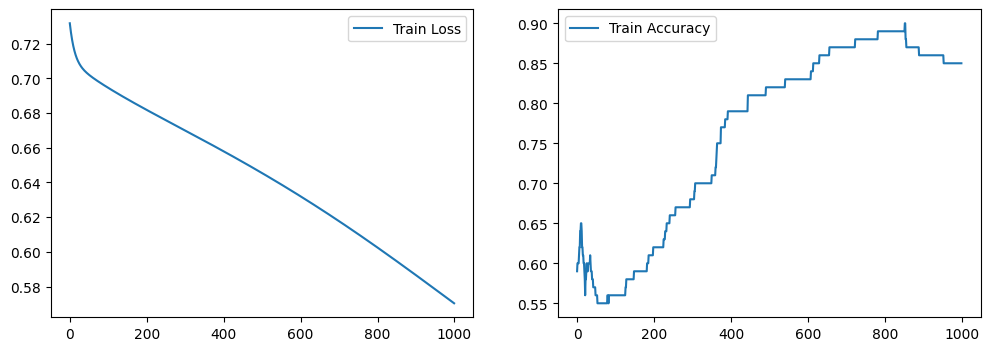

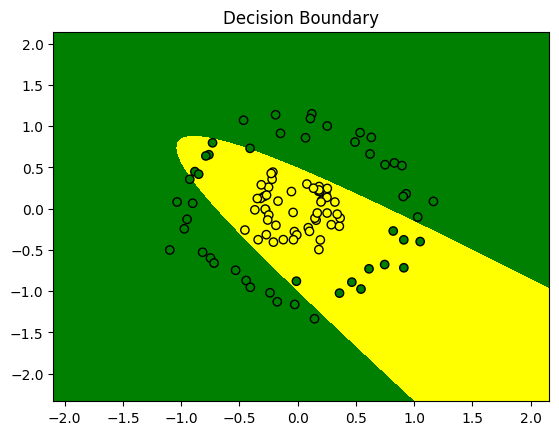

In [43]:
parametres = neural_network(X, y, n1=2)

On remarque que l'apprentissage n'est pas encore terminé car la fonction couot ne se stabilise pas.

100%|██████████| 1000/1000 [00:03<00:00, 286.17it/s]


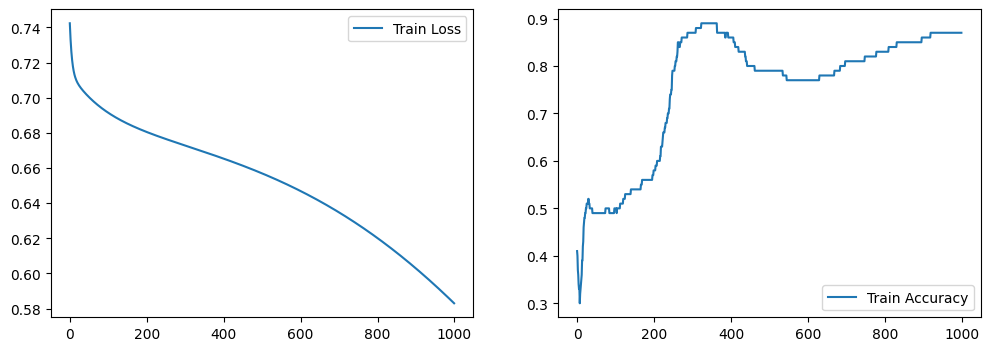

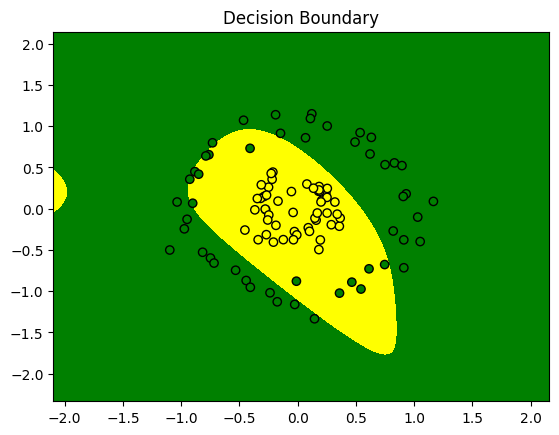

In [48]:
parametres = neural_network(X, y, n1=8)

100%|██████████| 1000/1000 [00:03<00:00, 295.63it/s]


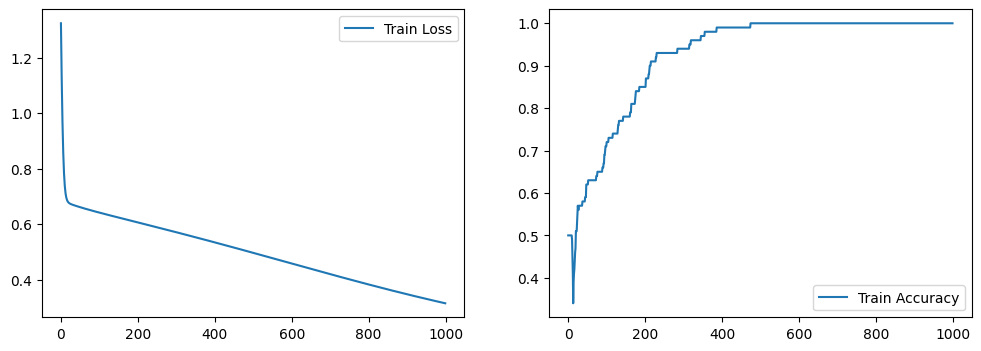

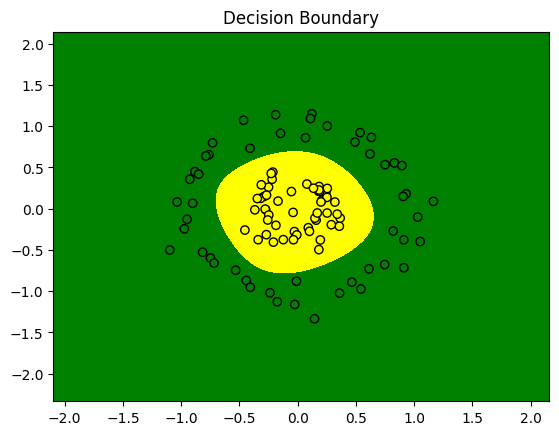

In [47]:
parametres = neural_network(X, y, n1=16)

100%|██████████| 1000/1000 [00:04<00:00, 217.07it/s]


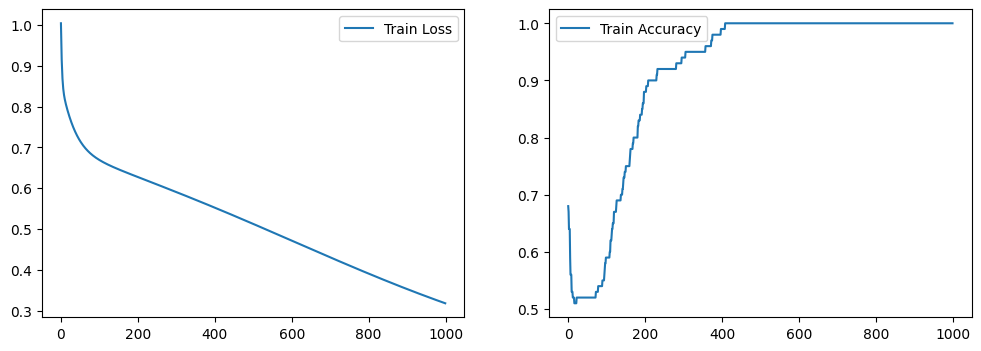

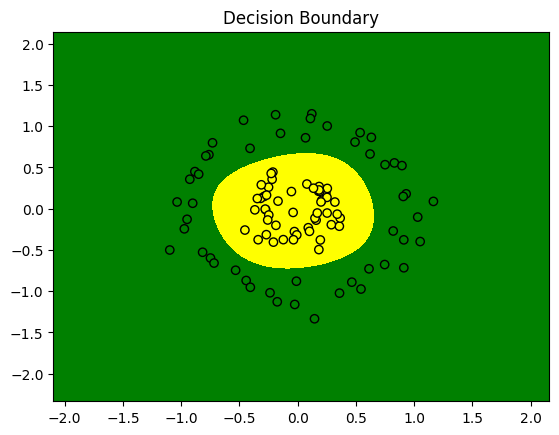

In [46]:
parametres = neural_network(X, y, n1=32)

On général, on utilise des puissances de 2 pour des raisons d'optimisation de memoire.
On constate que plus le nombre de neurones augmente, plus la performance du modèle est meilleure.